Diamond Price Prediction

##Objective: The objective of the project is to predict the price of the given diamond dataset.

In [1]:
import pandas as pd

In [2]:
## Data Ingestion
df = pd.read_csv("C:\\Users\\Siddharth Gupta\\Downloads\\DiamondPricePrediction\\notebooks\\data\\gemstone.csv")

In [3]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [4]:
## Missing values
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [5]:
##No missing Values found in the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [7]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [8]:
##Dropping the ID column as it is not significant in price prediction
df = df.drop('id', axis =1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [9]:
##Checking for the duplicate rows
df.duplicated().sum()

0

In [10]:
## No duplicates found in the data

In [11]:
##Segrating numerical & categorical columns
## Later will create two pipelines to handle numerical & categorical data

num_colmn = df.columns[df.dtypes !='object']
cat_colmn = df.columns[df.dtypes =='object']
print('Numerical Columns :', num_colmn)
print('Categorical Columns :', cat_colmn)

Numerical Columns : Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns : Index(['cut', 'color', 'clarity'], dtype='object')


In [12]:
df[cat_colmn].describe()

,cut,color,clarity
count,193573,193573,193573
unique,5,7,8
top,Ideal,G,SI1
freq,92454,44391,53272


In [13]:
df['cut'].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

In [14]:
df['color'].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [15]:
df['clarity'].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

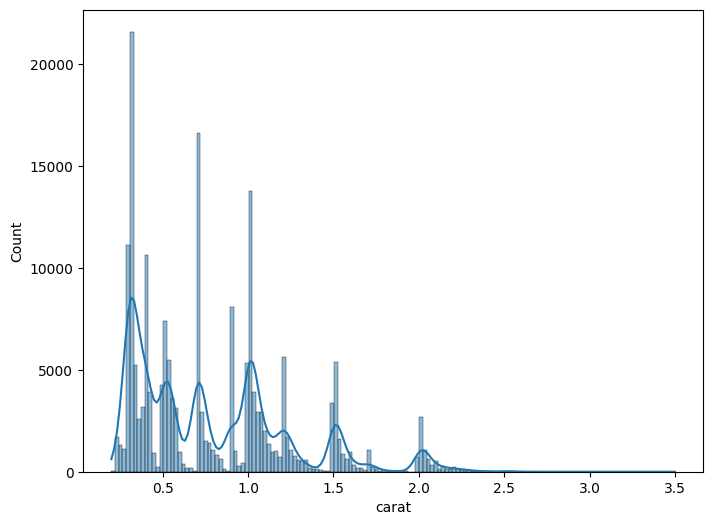

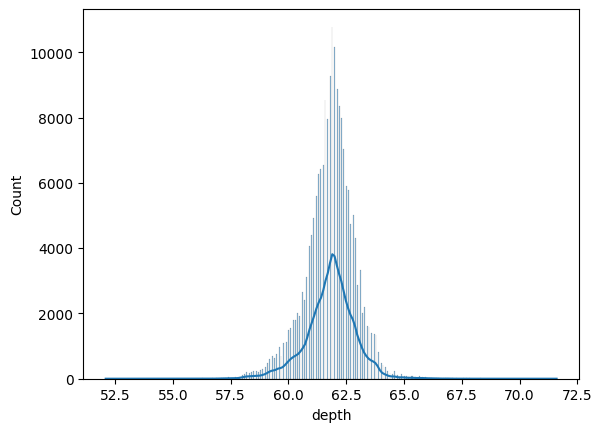

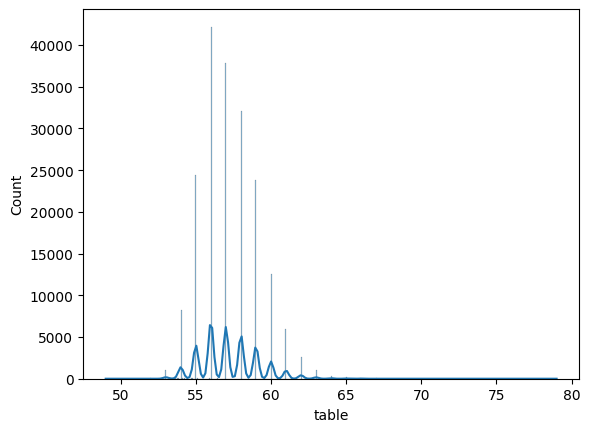

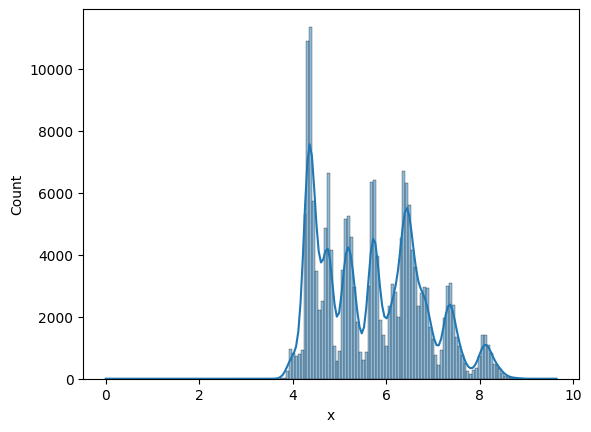

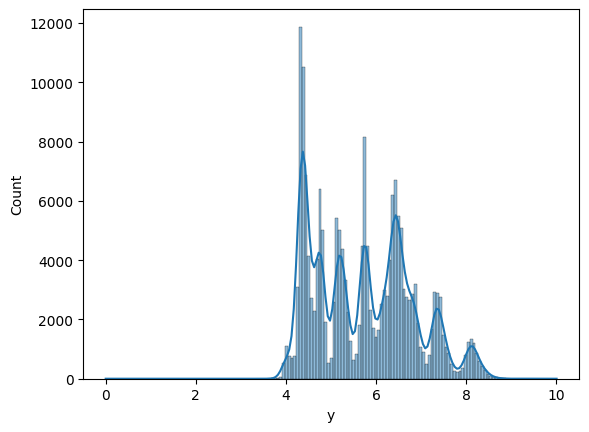

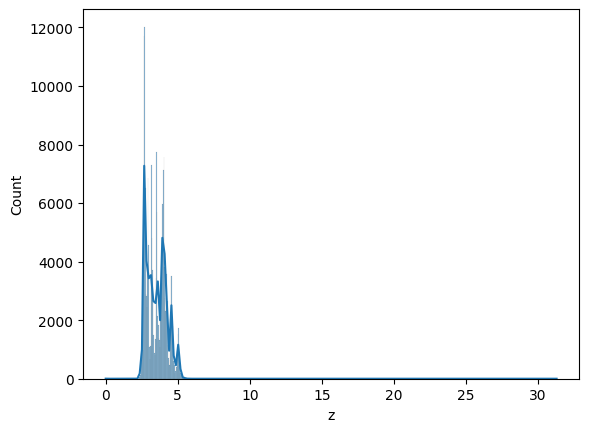

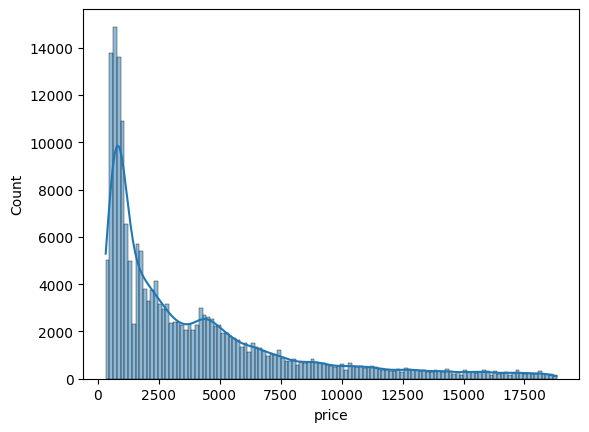

In [16]:
## Checking hist plot for every numerical column
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (8,6))
x=0
for i in num_colmn:
    sns.histplot(data = df, x=i,kde =True)
    print('\n')
    plt.show()

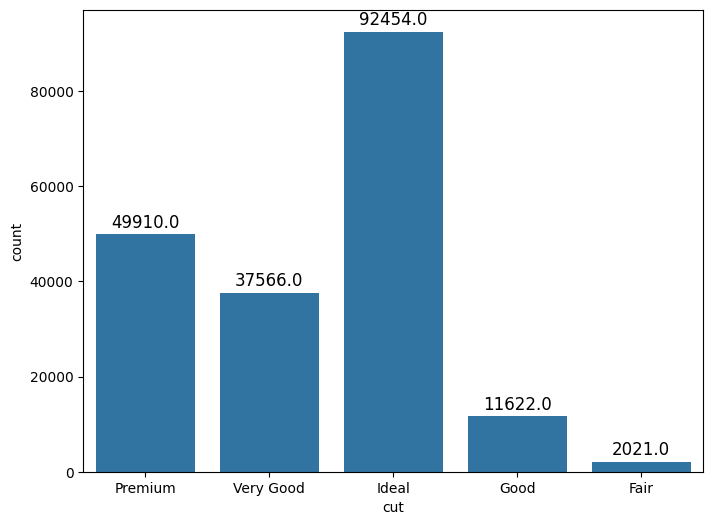

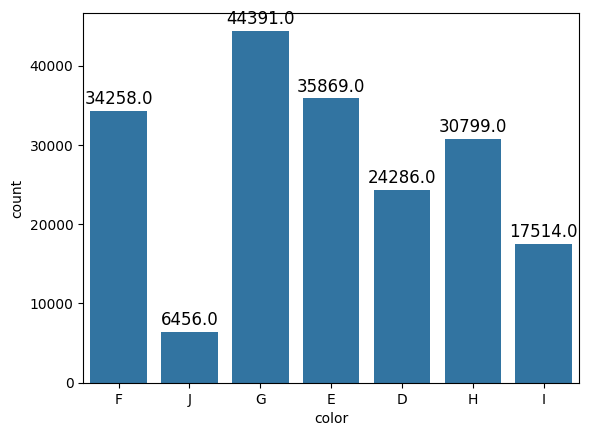

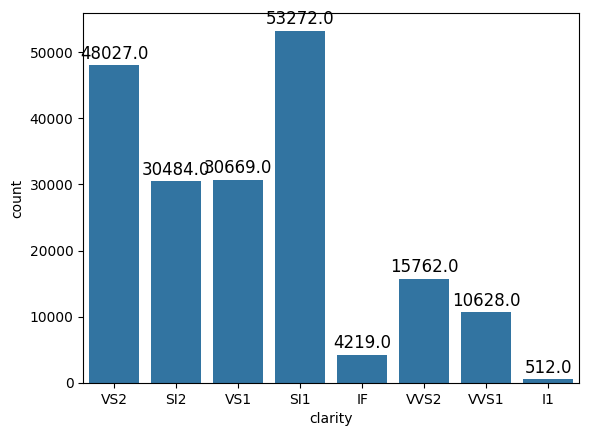

In [17]:
## Checking count plot for every categorical column

plt.figure(figsize = (8,6))
x=0

for i in cat_colmn:
    ax = sns.countplot(data = df, x=i)

     # Annotate each bar with the count
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    print('\n')
    plt.show()

<Axes: >

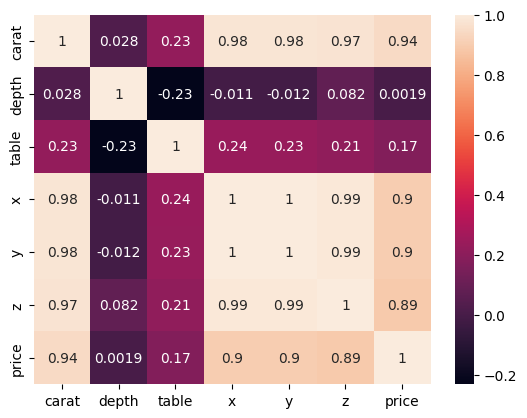

In [18]:
## Heatmap for observation on correlation
sns.heatmap(df[num_colmn].corr(), annot=True)

In [20]:
### We can see Column x, y ,z are corelated to each other and with carat column too so we can drop x,y & z which are 
# correlated with carat as their is very high corelation and for predicting price, they might not be significant

In [21]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [23]:
df['cut'].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [24]:
##Ranking the ordinal data with reference to below website on Diamond grading system
## https://www.americangemsociety.org/buying-diamonds-with-confidence/ags-diamond-grading-system/

cut_map = {'Ideal':5 ,'Premium':4, 'Very Good':3, 'Good':2, 'Fair':1}

In [25]:
df['clarity'].unique()

array(['VS2', 'SI2', 'VS1', 'SI1', 'IF', 'VVS2', 'VVS1', 'I1'],
      dtype=object)

In [26]:
clarity_map = {'IF':8, 'VVS1':7, 'VVS2':6, 'VS1':5, 'VS2':4, 'SI1':3, 'SI2':2, 'I1':1}

In [27]:
df['color'].unique()

array(['F', 'J', 'G', 'E', 'D', 'H', 'I'], dtype=object)

In [28]:
color_map = {'J':7,'I':6, 'H':5, 'G':4, 'F':3, 'E':2, 'D':1}

In [29]:
df['cut'] = df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map) 

In [30]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   carat    193573 non-null  float64
 1   cut      193573 non-null  int64  
 2   color    193573 non-null  int64  
 3   clarity  193573 non-null  int64  
 4   depth    193573 non-null  float64
 5   table    193573 non-null  float64
 6   x        193573 non-null  float64
 7   y        193573 non-null  float64
 8   z        193573 non-null  float64
 9   price    193573 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 14.8 MB
